# Исследование данных о российском кинопрокате

В этой работе мы изучим рынок российского кинопроката.

 С помощью анализа бюджета, сборов и рейтингов проанализируем вышедшие в прокат фильмы. Выделим тренды, рассмотрим окупаемость фильмов. Отдельно изучим фильмы получающие государственную поддержку.

Для анализа используем данные опубликованные на портале открытых данных министерства культуры Российской Федерации. 

План работы:

1) Получить данные и преобразовать их.

2) Провести первичный анализ и преобрабоку данных:

 - Изучить формат, где необходимо внести корректировки.
 - Изучить пропуски, где возможно дополнить необходимой информацией.
 - Проверить данные на наличие дубликатов, явных и нет.
 - Добавить столбцы с необходимой для дальнейшего исследовательского анализа данными.
 
3) Провести исследователский анализ.

3.1 Анализ всех фильмов вышедших в кинопрокат.

- Анализ количества фильмов в разные периоды времени.
- Анализ сборов в общем по годам и средних медианных прказателей.
- Взимосвязь сборов по ранзным категориям фильмов.

3.2 Анализ фильов получивших государственную поддержку.

- Сколько фильмов с поддержкой выходило за данный период времени, с разбивкой по годам и по источникам финансирования.
- Анализ бюджета, "условная окупаемость" фильмов.
- Анализ сборов по годам, динамика.
- Топ самых дорогих фильмов.
- Топ самых кассовых фильмов.
- Топ самых популярных у зрителей фильмов.
- Самые популярные и самые кассовые фильмы.

In [1]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/Users/mariaspartalan/Desktop/готовые проекты/2 МКРФ movies/mkrf_movies.csv')
df2 = pd.read_csv('/Users/mariaspartalan/Desktop/готовые проекты/2 МКРФ movies/mkrf_shows.csv')

In [3]:
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Таблица df1 содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.
  
***ВАЖНО:*** столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

In [4]:
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Таблица df2 содержит сведения о показах фильмов в российских кинотеатрах.

* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

In [5]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Нам нужно объединить два датафрейма. Будем это делать по графе с одинаковыми данными по первому и второму массиву, номеру прокатного удостоверения.

## Предобработка данных
### Объединение таблиц

Рассмотрим информацию об этих таблицах подробнее.

In [6]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

   Нам нужно объединить два датафрейма. Будем это делать по графе с одинаковыми данными по первому и второму массиву, номеру прокатного удостоверения. Но в первом массиве в этой графе общий тип данных, в то время как во втором он целочисленный. Второй вариант вернее, преобразуем столбец puNumber в первом массииве.

In [7]:
#df1['puNumber'] = pd.to_numeric(df1['puNumber'])
#df1.info()

Не получается. Рассмотрим в каком месте возникла заминка.

In [8]:
df1[~df1['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1['puNumber'] = df1['puNumber'].str.replace('нет', '0').str.strip()
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce')

Теперь соеденим 2 датафрейма в 1.

In [10]:
movies = df1.merge(df2, on = 'puNumber', how='left')
movies.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Всего 2 строки. 

В первой, скорее всего есть пробел, в начале или в конце, удалим.


Во втором, нет информации о номере прокатного удостоверения. Возможно у этого фильма, его просто нет, а может данные утерялись. В любом случаем заменм на 0.
И повторим плопытку перевести данные в другой формат.

In [11]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

На выходе получилась одна общая таблица которая объединяет в себе информацию из каждого массива.
В данных содержится информация о 7486 фильмах. Нужно проанализировать и поправить формат данных в ratings.

### Тип данных и запись

1) Экспоненциальная запись числа

In [13]:
#Убираем экспоненциальную запись числа
pd.set_option("display.float_format", "{:.2f}".format)

2) Дата
  
   Поправим формат даты.

In [14]:
movies['show_start_date'] = (
    pd.to_datetime(movies['show_start_date'],
                   format=('%Y-%m-%dT%H:%M:%S.%fZ'))
                           .dt.date
                          )

3) Ratings
  
   Рассмотрим чуть подробнее информацию о рейтингах.

In [15]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Часть рейтингов указана в бальной системе, от 0 до 10. Часть в процентном виде. Приведем все к одинаковому формату, десятибальной шкале.

In [16]:
#Заменим знаки % на пробел, затем удалим его
movies['ratings'] = movies['ratings'].str.replace('%', '').str.strip()
#приеобразуем формат столбца на числовой
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')
#рейтинги размером от 10 до 100 (бывшие процентные значения, разделим на 10 и перезапишем столбец)
movies.loc[movies['ratings'] > 10, 'ratings'] = movies.loc[movies['ratings'] > 10, 'ratings'] / 10

In [17]:
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В этой части работы:

- Объеденена информация из двух датафреймов в один. 

- Подкорректирован столбец в датой начала проката.

- Данные о рейтингах приведены в к общему виду.

### Работа с пропусками

Изучим общую информацию о пропусках

In [18]:
pd.DataFrame(round(movies.isna().mean()*100)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Прослеживается закономерность. Одинаковое количество пропусков в графах об источниках государственного финансирования, объеме возвратных средств государственной поддержки, объеме возвратных средств государственной поддержки и бюджете. 

Все вполне логично, в графе budget указан полный объем государственной поддерржки, в остальных столбцах подробности этой поддержки, ее источник и объемы тех и иных средств. Следовательно, можно заменить пропуски в financing_source на "Частное". Пропуски в количественных данных бюджета, оставим без изменений, чтоб они не размазывали картину значений.

In [19]:
movies['financing_source'] = movies['financing_source'].fillna('Частное')

Рассмотрим фильмы без государственного финансирования.

In [20]:
movies.query('financing_source == "Частное"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Частное,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Частное,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Частное,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Частное,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,NaN,NaN,NaN


Пропуски в таких графах как студия производитель, и жанр скорее всего связаны просто с отсутствием данных. Можем заменить на значение "не указано"

In [21]:
movies['film_studio'] = movies['film_studio'].fillna('не указана')
movies['genres'] = movies['genres'].fillna('не указан')


Продюссер и режиссер. Может такое быть, что у фильма один человек исполняет эти две роли. 
Заполним пропуски в этих столбцах, копируя данные друг у друга.

Если же нет ни одного, ни второго, то запишем "нет данных".

In [22]:
movies['director'] = movies['director'].fillna(value=movies['producer'])
movies['producer'] = movies['producer'].fillna(value='нет данных')
movies['producer'] = movies['producer'].fillna(value='нет данных')

Пропуски в данных о рейтинге могут быть связаны отсутствием каких-либо оценок у фильма, возможно он еще не вышел в прокат, или просто не захотел пока никто оценить. Оставим без изменений.

In [23]:
movies.loc[movies['ratings'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Частное,NaN,не указан,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Частное,NaN,не указан,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,NaN,не указан,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,нет данных,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,NaN,не указан,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Частное,NaN,не указан,NaN


In [24]:
pd.DataFrame(round(movies.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.100000
producer,0.000000
age_restriction,0.000000
refundable_support,95.600000


На данном этапе работы, мы почистили данные от пропусков, где необходимо.

- Кино которое не получало государственного субсидирования отметили как "частное".

- Пропуски в категориях страна, продюссер, режиссер и жанр заменила на "не указано".

- Пропуски в рейтингах оставили без изменений.

- Пропуски в кассовых сборах,тоже оставили без изменений.

### Дубликаты в датафрейме

Посмотрим есть ли в данных дублирующиеся строки.

In [25]:
print('Количество дубликатов:', movies.duplicated().sum())

Количество дубликатов: 0


Рассмотрим данные на наличие неявных дубликатов.
Изучим количество уникальных значений в каждом столбце.

In [26]:
movies.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        950
director                 4816
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    84
genres                    743
box_office               2938
dtype: int64

Ранее мы уже писали, что в данных у нас инфорция о 7486 фильмах. Отклонение  в категория title, puNumber, говорит нам о наличии повторящихся значений в определенной категории.

Например в столбце с номером прокатного удостоверения 7484 значения.

Это значит где-то есть 2 дубля.

In [27]:
movies.loc[movies['puNumber'].duplicated(keep=False)].sort_values(by='puNumber')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Частное,6.80,"комедия,криминал",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,7.60,"драма,мелодрама,история",NaN



Фильм "Анализируй это". Есть 2 строки в с данными о нем. Имеются различия в категории о стране о производителе в транслитерации имени режиссера, а так же разные возрастные категории. Возможно, есть 2 версии фильма. Одна более цензурированная, потому получила категорию 12+.


Для красоты поправим имя режиссера, это не критично, но можем заменить номер второй версии на выдуманнный, например 111111111


И есть 2 абсолютно разных фильма, с одинаковым прокатным номером. Такое невозможно. Скорее всего, это просто ошибка при оформлении данных. Не критично, но можем изменить номер на выдуманнный 222222222</div>

In [28]:
movies.loc[5068, 'puNumber'] = 111111111
movies.loc[4639, 'puNumber'] = 222222222
movies['director']= movies['director'].str.replace('ХЭрольд Рэмис', 'Гарольд Реймис')

Повторы в графе show_start_date обоснованы. В один день могло выйти несколько фильмов в прокат.

Изучим данные графы "type".

In [29]:
movies['type'].value_counts()

type
Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

Есть неявные дубликаты, вызванные наличием лишних пробелов. Удалим их и посмотрим еще раз.

In [30]:
movies['type'] = movies['type'].str.strip()
movies['type'].value_counts()

type
Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64

По такому же приципу уберем лишние пробелы, и пробелы в начале и в конце строки в столбцах где они могут теоритически оказаться film_studio, production_country, producer, director, и genres. 

In [31]:
names = ['film_studio', 'production_country', 'producer', 'director', 'genres']

for name in names:
    movies[name] = movies[name].str.strip()

В графе title може могу быть повторы,  значит один фильм выходил в прокат не один раз, и каждый раз с новым прокатным удостоверением соотвественно.

In [32]:
movies.loc[movies['title'].duplicated(keep=False)].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,Частное,6.70,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,Я ненавижу день святого Валентина,221139210,2010-12-03,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,5.00,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,6.30,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Частное,6.30,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15,Документальный,не указана,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Частное,NaN,не указан,NaN


Все логично, оставляем без изменений.

Рассмотрим данные о стране производителе чуть подробнее.

In [33]:
movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Много

In [34]:
len(movies['production_country'].unique())

935

935 значений. В первую очередь видно, что где-то страны перечислены черезь"-", а где-то чепез и ",". 

Поставим везде просто "-".

In [35]:
movies['production_country'] = movies['production_country'].str.replace(',', '-' )
movies['production_country'] = movies['production_country'].str.replace(' - ', '-' )
len(movies['production_country'].unique())

864

Все равно очень много вариаций, оставим одну заглавную страну

In [38]:
for country in movies['production_country']:
    main_country = country.split('-')
    movies['production_country'] = main_country[0]    

Рассмотрим age_restriction

In [39]:
movies['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

Здесь все корректно

На данном этапе мы рассмотрели подробнее категориальные значения.

- Заменили дубликаты в графе о номере прокатного удостоверия.

- Откорректировали даные в графах 'type', 'film_studio', 'production_country', 'producer', 'director', 'genres', удалив них лишние пробелы, тем самым исключив наличие неявных дубликатов.

- В графе страна оставили только первое, основное значение.


### Анализ количественных данных

Изучим внимательнее фильмы с государственной поддержкой.


In [40]:
movies['financing_source'].value_counts()

financing_source
Частное                             7154
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: count, dtype: int64

In [41]:
print('Снято', len(movies.query('financing_source != "Частное"')), 'фильма с участием государственной поддержки')

Снято 332 фильма с участием государственной поддержки


In [42]:
movies.query('financing_source != "Частное"').head(30)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",США,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",США,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,не указан,28140.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",США,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",США,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",США,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18,Анимационный,"ООО ""Студия ""Мастер-Фильм""",США,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60
1870,А зори здесь тихие..._,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",США,Р.Давлетьяров,нет данных,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70
1871,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...",США,В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50
1903,Призрак_.,111001815,2015-03-02,Художественный,"ООО ""Водород 2011""",США,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.00,"триллер,боевик,приключения",352804320.40
1912,Ведьма .,111002215,2015-03-05,Художественный,"ООО ""Кинокомпания ""Ракурс""",США,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.40,"фэнтези,приключения,драма",51907.50


Не у всех фильмов с гос.поддержкой указан бюджет. а где-то где он указан он меньше суммы зарезервированных для него возвратных и невозвратных средств. Составим отдельный датафрейм с ними.

In [43]:
incorrect_budget = movies[movies['budget'] < (movies['refundable_support'] + movies['nonrefundable_support'])]
incorrect_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",США,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",США,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",США,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",США,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",США,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",США,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",США,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


In [44]:
movies['gos_fin_perc'] = (movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']
gosfin_perc = movies['gos_fin_perc'].median().round(2)
print('Коэффициент поддержки фильмов государством', gosfin_perc)

Коэффициент поддержки фильмов государством 0.61


Зная этот коэффициент можем заполнить пропуски в графе бюджет и подставить эти значения в исходную таблицу.

In [45]:
movies.loc[incorrect_budget.index, 'budget'] = \
(movies.loc[incorrect_budget.index, 'refundable_support'] + movies.loc[incorrect_budget.index, 'nonrefundable_support'])\
/ gosfin_perc
movies.loc[incorrect_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",США,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,37704918.03,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,inf
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",США,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,122950819.67,Фонд кино,6.60,драма,446163511.00,inf
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",США,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,131147540.98,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,inf
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,32786885.25,Фонд кино,6.20,"комедия,фэнтези",67418974.80,inf
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",США,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,262295081.97,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,inf
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",США,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,96721311.48,Фонд кино,6.30,"комедия,драма",1957738.51,inf
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,57377049.18,Фонд кино,5.10,"комедия,мелодрама",72937783.20,inf
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",США,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,9836065.57,Министерство культуры,4.30,комедия,15362931.43,inf
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",США,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,114754098.36,Фонд кино,6.30,"комедия,мелодрама",70299052.00,inf
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",США,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,409836065.57,Фонд кино,5.60,фантастика,1038321489.00,inf


В этом пункте мы дополнили данные о фильмах с гос.поддержкой:

* Расчитали медианный коэффициент поддержки фильмов государством.

* Зная этот коэффициент расчитали и дополнили таблицу данными о бюджете.

### Добавление новых параметров





 Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [46]:
#создаем отдельный столб с указанием года проката
movies['show_year'] = pd.DatetimeIndex(movies['show_start_date']).year

Создадимименем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [47]:
#создаем столбец в с который оставит первый из указанных жанров, как главный.
for g in movies['genres']:
    main_g = g.split(',')
    movies['main_genre'] = main_g[0]   

In [48]:
#создаем столбец в с который оставит первый из указанных режиссеров, как главный.
for d in movies['director']:
    main_d = str(d).split(',')
    movies['main_director'] = main_g[0] 

В это пункте работы добавлены новые столбцы, содержащие информацию о годе проката, главном жанре и главном режиссере.

**************

**ПРОМЕЖУТОЧНЫЙ ВЫВОД:**

1) Выгрузка данных.
  
    В данном пункте нами была проведена работа по обработке сырых данных. В нашем распоряжении данные, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

 Информация объеденена в 1 датафрейм.

- Подкорректирован столбец в датой начала проката.

- Данные о рейтингах приведены в к общему виду.

2) Обраотка пропусков.

- Кино которое не получало государственного субсидирования отметили как "частное".

- Пропуски в категориях страна, продюссер, режиссер и жанр заменила на "не указано".

- Пропуски в рейтингах оставили без изменений.

- Пропуски в кассовых сборах,тоже оставили без изменений.  

3) Работа с дубликатами.

- Заменили дубликаты в графе о номере прокатного удостоверия.

- Откорректировали даные в графах 'type', 'film_studio', 'production_country', 'producer', 'director', 'genres', удалив них лишние пробелы, тем самым исключив наличие неявных дубликатов.

- В графе страна оставили только первое, основное значение.

4) Обработка количнственных значений.

- Расчитали медианный коэффициент поддержки фильмов государством. Зная этот коэффициент, расчитали и дополнили таблицу данными о бюджете.

5) Добавили новые столбцы

- год выпуска фильма

- main_director, заглавный режиссер

- main_genre, основной жанр.
  

### Исследовательский анализ данных

#### Общий анализ

Эти данные содержаться в movies['gos_fin_perc']. Можно рассмотреть эти данные отдельно.

In [49]:
movies.query('budget > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",США,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,0.33,2013,комедия,комедия
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",США,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,не указан,28140.00,0.70,2014,комедия,комедия
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",США,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,0.61,2013,комедия,комедия
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",США,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,0.69,2014,комедия,комедия
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",США,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,0.62,2014,комедия,комедия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",США,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,0.51,2019,комедия,комедия
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",США,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,0.53,2019,комедия,комедия
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",США,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,0.53,2019,комедия,комедия
7476,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",США,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,0.65,2019,комедия,комедия


Рассмотрим, сколько фильмов выходило в прокат каждый год. 

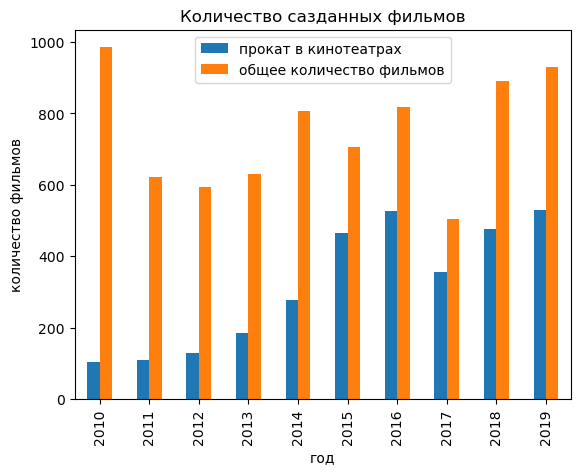

In [50]:
year_analisys = movies.pivot_table(index='show_year',
                                   values=['box_office', 'puNumber'],
                                   aggfunc='count'
                                  )
year_analisys.columns = ['прокат в кинотеатрах', 'общее количество фильмов']
year_analisys.plot(kind = 'bar',
                  title = 'Количество сазданных фильмов')

plt.ylabel('количество фильмов')
plt.xlabel('год')

plt.show();

In [51]:
year_analisys['доля фильмов в прокате кинотеатров, %'] = \
year_analisys['прокат в кинотеатрах'] / year_analisys['общее количество фильмов'] * 100
year_analisys

,прокат в кинотеатрах,общее количество фильмов,"доля фильмов в прокате кинотеатров, %"
show_year,,,
2010,105,985,10.66
2011,109,622,17.52
2012,128,593,21.59
2013,184,630,29.21
2014,279,807,34.57
2015,465,705,65.96
2016,526,818,64.30
2017,357,505,70.69
2018,475,891,53.31


Не смотря на то, что 2010-й год был самым урожайным на количество выданных удостоверений, в кинотеатры попала лишь 10% фильмов.

Общее количество фильмов год от года менялось весма рандомным образом от 505 до 930.

Самое меньшее количество фильмов вышло в 2017-м. Зато в кинопрокате оказалась большая часть из них, 70%.

В 2018-м ровно наоборот, вышло очень много фильмов, 891. И не смотря на то, до театров дошло 475, в процентном отношении провал на 17%.


In [52]:
year_analisys['сумма сборов'] = movies.groupby('show_year')['box_office'].sum()
year_analisys['сумма сборов'] = year_analisys['сумма сборов'] / 1000000
year_analisys

,прокат в кинотеатрах,общее количество фильмов,"доля фильмов в прокате кинотеатров, %",сумма сборов
show_year,,,,
2010,105,985,10.66,2.43
2011,109,622,17.52,14.10
2012,128,593,21.59,6.96
2013,184,630,29.21,29.80
2014,279,807,34.57,7444.95
2015,465,705,65.96,39497.37
2016,526,818,64.30,47866.30
2017,357,505,70.69,48563.71
2018,475,891,53.31,49668.40


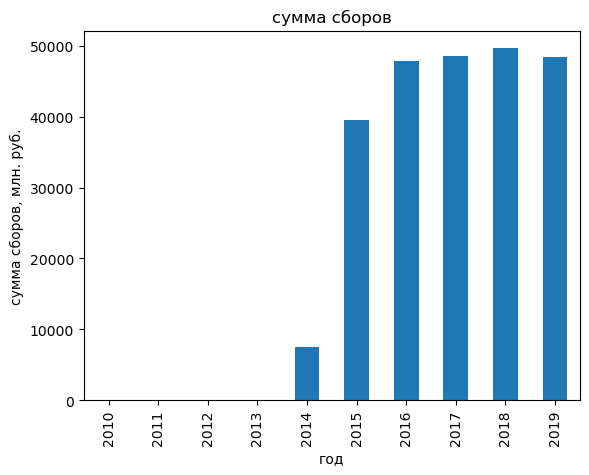

In [53]:
year_analisys['сумма сборов'].plot(kind = 'bar',
                                   title = 'сумма сборов');
plt.ylabel('сумма сборов, млн. руб.')
plt.xlabel('год');

Не смотря на весьма неодназначные данные по количеству вышедших в прокат фильмов в год, по сумме сборов всегда прирост, разве что в 2019 показатель чуть меньше, недели годом ранее.

Самый резкий скачок произошел в 2015-м году. Скорее всего это связанос курсом доллара. Добавим его динамику отдельно.

''

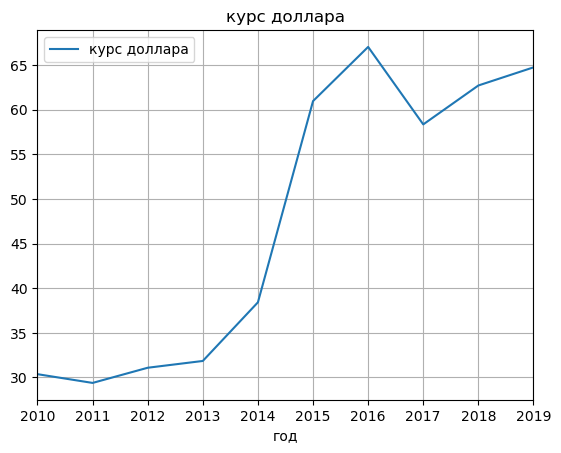

In [54]:
data = {'год': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'курс доллара': [30.37, 29.39, 31.09, 31.85, 38.42, 60.96, 67.03, 58.35, 62.71, 64.74]
        }
dollar = pd.DataFrame(data)
dollar.plot(kind = 'line',
           x='год',
           y='курс доллара',
           xlim=(2010, 2019),
           grid=True,
           title = 'курс доллара')
;

Так и есть резкий взлет в 2015-м. В 2017 доллар чуть сдал свои позиции, но как мы помним из анализа выше, в этом году вышло самое большое количество фильмов за это 10-летие, потому логично что на объемах кассовых сборов это не отрпзилось.

Рассмотрим медианную доходность от фильмов по годам. Для начала для удобства визуализации сборы переведем сиз рублей в милионы рублей.

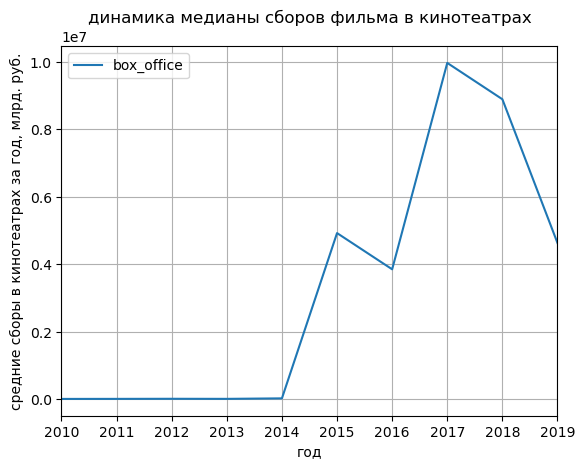

In [55]:

(
    movies.pivot_table(index = 'show_year',
                  values = 'box_office',
                  aggfunc = 'median')
    .plot(kind = 'line',
         title = 'динамика медианы сборов фильма в кинотеатрах',
         grid = True,
         xlim = (2010, 2019))
)

plt.ylabel('средние сборы в кинотеатрах за год, млрд. руб.')
plt.xlabel('год')

plt.show();


Рассмотрим график изменения медианной прибыли в кинопрокатах по годам. Резкий скачок был в 2014 году. Как раз когда курс доллара к рублю взлетел. 

В 2016 году в прокат в кинотеатрах вышло много фильмов, 526. А как говорит основной закон рыночной экономики гласит – чем выше конкуренция, тем ниже прибыль. соотвественно ниже медианное значение средней доходности на 1 фильм.

А в 2017-м как раз выходило меньше количество фильмов и медиана снова взлетила, это самый высокий показатель периода 2010-2019.
Расчитаем кооэффициент Пирсона для этих 2 показателей.

In [56]:
#Для расчета Пирсона создадим отдельный датафрейм, который на далее не будет нужен
b = (
    movies.query('box_office >0')
          .pivot_table(index = 'show_year',
                       values = 'box_office',
                       aggfunc = ['median', 'count'])
)
b.columns = ['медианная прибыль', 'количество фильмов']
print(b)
b['медианная прибыль'].corr(b['количество фильмов'])

           медианная прибыль  количество фильмов
show_year                                       
2010                 1710.00                 101
2011                 3000.00                 109
2012                 6220.00                 123
2013                 3580.00                 179
2014                20400.00                 273
2015              5003450.15                 462
2016              3915041.02                 525
2017              9968340.00                 357
2018              8891102.21                 475
2019              4627798.34                 530


0.7167456620203876

Коэффициент Пирсона 0.72, это говорит нам о высокой коррелиции, из таблицы видно, что чем больше выходило фильмов, тем меньше средняя доходность по ним.

Рассмотрим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Рассмотрим в цифрах сборы фильмов по категориям

In [57]:


movies.pivot_table(index='show_year',
                columns='age_restriction',
                values='box_office',
                aggfunc='median')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_year,,,,,
2010,6052.50,2650.00,1000.00,915.00,NaN
2011,7010.00,3741.50,2835.00,520.00,450.00
2012,18067.50,3685.00,1600.00,1385.00,6475.00
2013,13225.00,2250.00,3300.00,1775.00,3457.50
2014,190855.00,6037.50,13640.00,180108.00,125810.00
2015,2943318.70,15351562.50,4676819.40,4616614.70,20380982.20
2016,2571294.10,4690635.25,5133021.74,6107001.74,3026256.15
2017,22178956.00,9010548.00,9702077.00,8212677.00,51992103.00
2018,3616937.28,8931965.66,9010638.62,7179466.00,14688850.32


Визуализируем с помощью графика

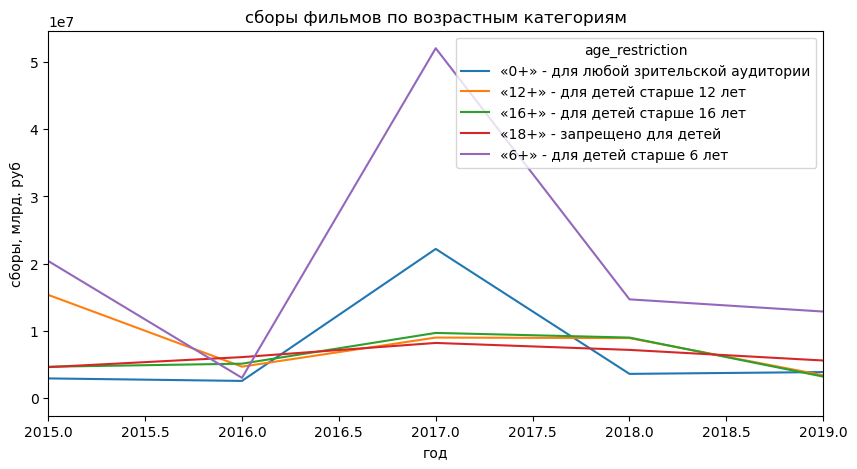

In [58]:
(
    movies.pivot_table(index='show_year',
                columns='age_restriction',
                values='box_office',
                aggfunc='median') \
    .plot(title='сборы фильмов по возрастным категориям',
          kind='line',
          xlim=[2015, 2019],
         figsize=(10, 5))
)
plt.ylabel('сборы, млрд. руб')
plt.xlabel('год')

plt.show();

Фильмы в категориях 12+, 16+, 18+ показывают весьма стабильную диамику.

А вот 0+ и 6+ год от года не стабильны. В 2017-м 6+ и 12+. Резко стрельнули. Посмотрим топ-5 кино того года в этих категориях.
 
**ТОП-5 «0+» - для любой зрительской аудитории":**

In [59]:
(
    movies.query('age_restriction =="«0+» - для любой зрительской аудитории" \
    and show_year == 2017')
    .sort_values(by = 'box_office', ascending = False)
    .head(5)
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director
3687,Урфин Джюс и его деревянные солдаты,114000817,2017-04-06,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",США,"Д.Шмидт, Ф.Дмитриев, В.Торопчин","С.Сельянов, А.Боярский",«0+» - для любой зрительской аудитории,0.00,75000000.00,344905389.00,Фонд кино,5.70,"мультфильм,приключения,детский",206478186.00,0.22,2017,комедия,комедия
5564,"Колобанга. Привет, Интернет!",114002817,2017-11-30,Анимационный,"ООО ""Колобанга""",США,"А.Романец, В.Марченко",А.Ревва,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,4.90,"мультфильм,детский",22178956.00,NaN,2017,комедия,комедия
3480,Маша и медведь. Новые истории,114001417,2017-05-25,Анимационный,"ООО ""Маша и Медведь""",США,"Г.Орлов, А.Беляев, Н.Мальгина, В.Байрамгулов","Д.Ловейко, О.Кузовков, М.Ратина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,NaN,не указан,941788.00,NaN,2017,комедия,комедия
2949,"Машкины Страшилки. Серия ""Чудовищная правда о ...",214011517,2017-06-09,Анимационный,"ООО Студия ""АНИМАККОРД"" - АНИМАККОРД ЛТД.",США,Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,NaN,не указан,NaN,NaN,2017,комедия,комедия
3223,МУЛЬТ в кино. Выпуск № 50,114000517,2017-03-21,Анимационный,"ООО ""Мульт в кино""",США,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Частное,3.90,"мультфильм,детский",NaN,NaN,2017,комедия,комедия


**ТОП-5 «6+» - для детей старше 6 лет:**

In [60]:
(
    movies.query('age_restriction == "«6+» - для детей старше 6 лет" \
    and show_year == 2017')
    .sort_values(by = 'box_office', ascending = False)
    .head(5)
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director
5653,Движение вверх,111011817,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",США,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,400000000.00,590192191.00,Фонд кино,7.50,"спорт,драма",2779686144.00,0.68,2017,комедия,комедия
3742,Гадкий я 3,124001617,2017-06-15,Анимационный,"Иллюминейшен Интертейнмент, Юниверсал Пикчерз",США,"Кайл Балда, Эрик Гуильон, Пьер Коффан","Кристофер Меледандри, Джанет Хили, Бретт Хоффман",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Частное,6.30,"мультфильм,фантастика,фэнтези",1390392637.00,NaN,2017,комедия,комедия
3235,Босс-Молокосос,124000317,2017-02-09,Анимационный,ДримУоркс Анимейшн,США,Том МакГрат,Рэмси Энн Наито,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Частное,6.50,"мультфильм,комедия,приключения",1376726723.00,NaN,2017,комедия,комедия
3637,Зверопой,124000217,2017-02-03,Анимационный,"Дентсю, Фьюджи Телевижн Нетворк Интертейнмент,...",США,"Гарт Дженнингс, Кристоф Лоурделет","Игорь Хайт, Джанет Хили, Бретт Хоффман",«6+» - для детей старше 6 лет,NaN,NaN,NaN,Частное,7.30,"мультфильм,мюзикл,комедия",886614109.00,NaN,2017,комедия,комедия
5641,Ёлки Новые,111011617,2017-12-21,Художественный,"ООО ""ТаББаК""",США,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.00,50000000.00,174381922.00,Фонд кино,5.80,"комедия,мелодрама",855451052.00,0.57,2017,комедия,комедия


#### Фильмы с государственной поддержкой

Рассмотрим отдельно фильмы с гос.поддержкой.

In [61]:
#сделаем для них отдельный датафрейм
gosmovies = movies.query('financing_source != "Частное"') 
#изменим вид бюджета, пусть сумма будет указываться в миллионах руб., чтоб графики далее были читабельнее
gosmovies = gosmovies.copy()
gosmovies['budget'] = gosmovies['budget'].apply(lambda x: x / 1000000)


In [62]:
print('в 2010 - 2019 годах вышло', len(gosmovies), 'фильма с государственной поддержкой.')

в 2010 - 2019 годах вышло 332 фильма с государственной поддержкой.


           количество фильмов
show_year                    
2013                        2
2014                       16
2015                       86
2016                       61
2017                       41
2018                       56
2019                       70


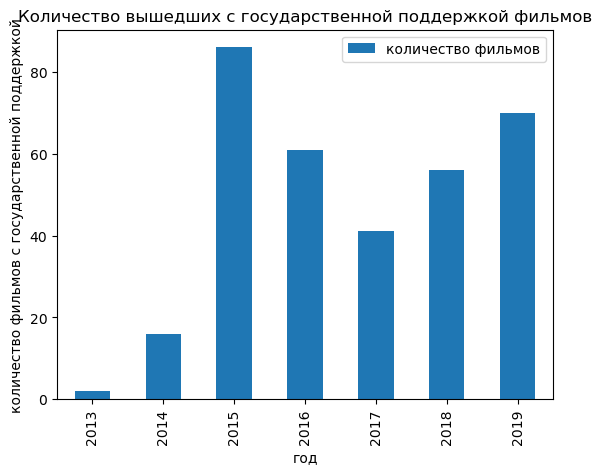

In [63]:

count_gosmovies = (
    gosmovies.pivot_table(index = 'show_year',
                 values = 'puNumber',
                 aggfunc = 'count')
)

count_gosmovies.columns = ['количество фильмов']

print(count_gosmovies)



count_gosmovies.plot(kind = 'bar',
   title = 'Количество вышедших с государственной поддержкой фильмов')

plt.ylabel('количество фильмов с государственной поддержкой')
plt.xlabel('год')

plt.show();


Самым активным, в плане фильмопроизвосдтва был 2015 год. Это касается как всех фильмов, там и конкретно фильмов с государственной поддержкой. аналогично и с 2017, самый тихий год в общем киномире и конкретно по фильмам с господдержкой.

Рассмотрим, разбивку по источникам финансирования.

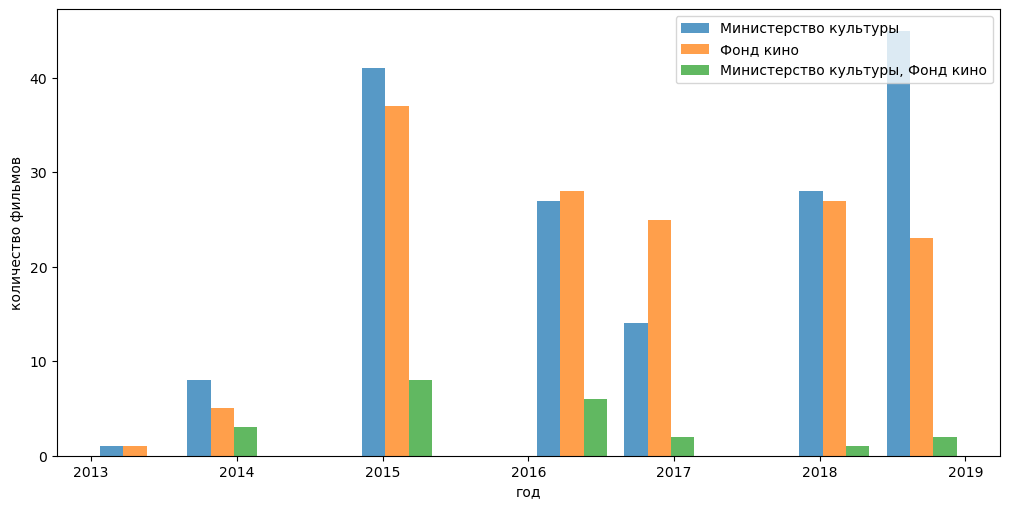

In [64]:

fig, ax = plt.subplots(figsize=(10,5))

colors = {"Министерство культуры, Фонд кино":"gray", "Министерство культуры":"blue", "Фонд кино":"red"}
data = []
labels = []
for i in gosmovies["financing_source"].unique():
    data.append(gosmovies.loc[gosmovies["financing_source"]==i, "show_year"].values)
    labels.append(i)

ax.hist(data, 10, alpha=0.75, label=labels)
ax.legend(prop={'size': 10})
fig.tight_layout()
plt.ylabel('количество фильмов')
plt.xlabel('год')

plt.show();               

А каких-то году больше фильмов спонсирует министерство культуры, в каком-то фонд кино. Тут нет четкой закономерности. Переведем суммы сборов в миллионы рублей, чтобы удобнее было рассматривать данные.

           суммарный бюджет фильмов
show_year                          
2013                         255.44
2014                        1317.19
2015                        8012.95
2016                        7763.37
2017                        7111.52
2018                        7223.78
2019                       12837.95


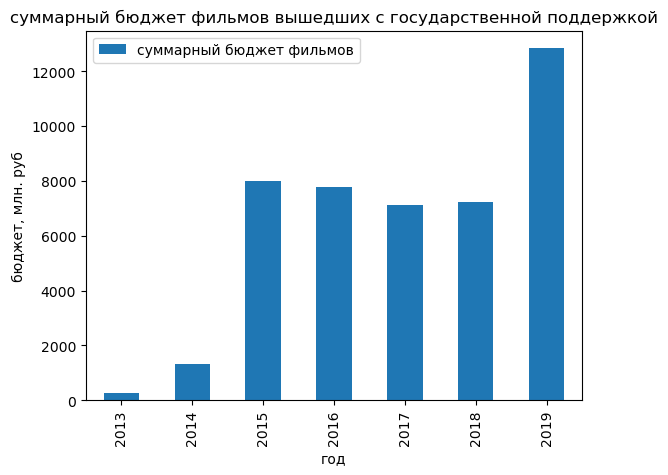

In [65]:


fin_gosmovies =  (
    gosmovies.pivot_table(index = 'show_year', 
                          values = 'budget',
                          aggfunc = 'sum')
)

fin_gosmovies.columns = ['суммарный бюджет фильмов']

print(fin_gosmovies)
fin_gosmovies.plot(kind='bar',
                   title = 'суммарный бюджет фильмов вышедших с государственной поддержкой')
plt.ylabel('бюджет, млн. руб')
plt.xlabel('год')

plt.show();

Объемы шокируют. Динамика объемов спонсирования в кино по годам. Опять наблюдается резкий скачок в 2015 с 255 миллионов рублей до 8 миллиардов. Причин могут быть 2, и резкий скачок курса доллара, и большЕЕ количество фильмов по сравнению с предыдущими годами. Количество вышедших в прокат фильмов в 2015 году больше чем в 5 раз больше, по отношение к предыдущем году.

Далее годовой бюджет потихоньку идет на убыль.

Второй резкий скачок финансирования был в 2019 году, с 7 миллиардов рублей до 12.3.
Посмотрим медианное значение денежных вливаний в фильм по годам. Но исключим 

           Медианный бюджет фильма с государственной поддержкой
show_year                                                      
2013                                                  127.72   
2014                                                   61.04   
2015                                                   57.73   
2016                                                   69.88   
2017                                                   78.10   
2018                                                  103.98   
2019                                                   78.39   


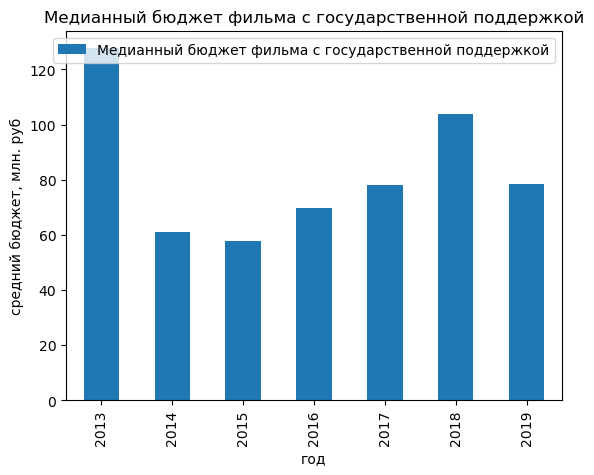

In [66]:
medianfin_gosmovies = (
    movies.query('financing_source != "Частное"')
    .pivot_table(index = 'show_year', 
                 values = 'budget',
                 aggfunc = 'median')
)

medianfin_gosmovies.columns = ['Медианный бюджет фильма с государственной поддержкой']
medianfin_gosmovies['Медианный бюджет фильма с государственной поддержкой'] = (
    medianfin_gosmovies['Медианный бюджет фильма с государственной поддержкой']/1000000
)
print(medianfin_gosmovies)    
medianfin_gosmovies.plot(kind = 'bar',
     title = 'Медианный бюджет фильма с государственной поддержкой')

plt.ylabel('средний бюджет, млн. руб')
plt.xlabel('год')

plt.show();

В 2013-м году вышло всего 2 фильма. Потому этот год не показательный.


Средняя стоимость фильма в 2015 году упала с 61 до 57 миллионов рублей. Значит увеличение объемов финансирования связано исключительно с количеством фильмов.

Самые дорогие фильмы выходили в 2018-м году, средний бюджет был 103 миллиона.

Рассмотрим статистику по сборам.

In [67]:
gen_gosmovies = gosmovies.pivot_table(index = 'show_year',
                      values = 'box_office',
                      aggfunc = ['sum', 'median', 'mean'])
gen_gosmovies.columns =  ['Общие кассовые сборы', 'Медианные кассовые сборы', 'Средние кассовые сборы']
gen_gosmovies

,Общие кассовые сборы,Медианные кассовые сборы,Средние кассовые сборы
show_year,,,
2013,20322385.10,10161192.55,10161192.55
2014,1017422166.60,5504517.85,63588885.41
2015,5785285418.14,9200824.50,68062181.39
2016,6081707839.10,17921115.61,101361797.32
2017,10865075300.96,50451949.00,278591674.38
2018,9934069010.25,27023390.31,177394089.47
2019,8409627454.63,25977291.30,140160457.58


Очень большие различия между кассовыми медианными и средними кассовыми сборами с 2016-го по 2019-й год. Это говорит нам о наличии какие-то ультрапопулярных фильмах в эти года. Визуализируем это.

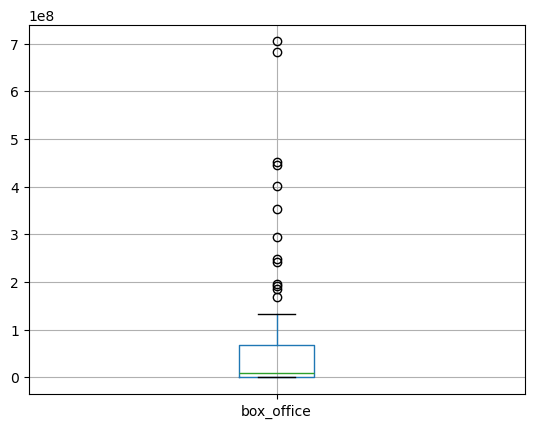

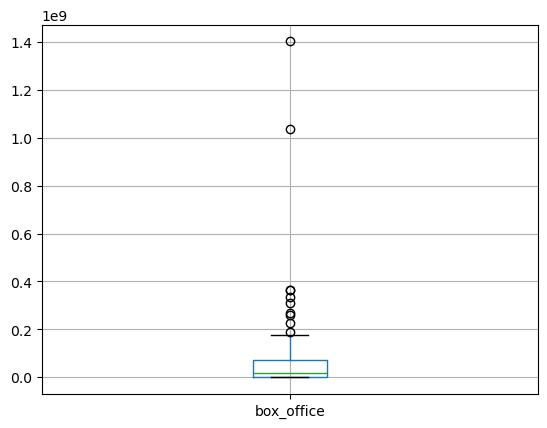

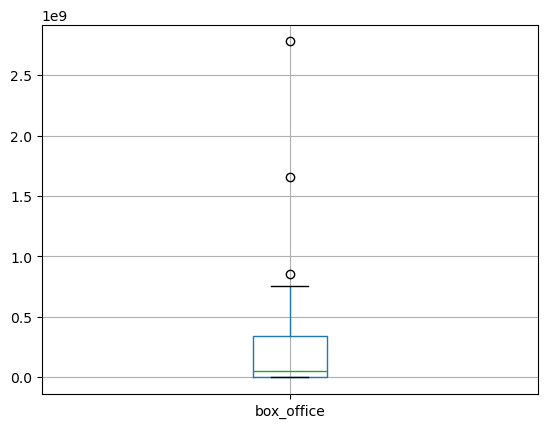

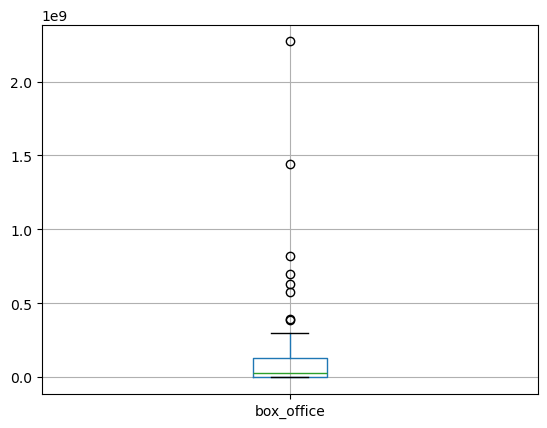

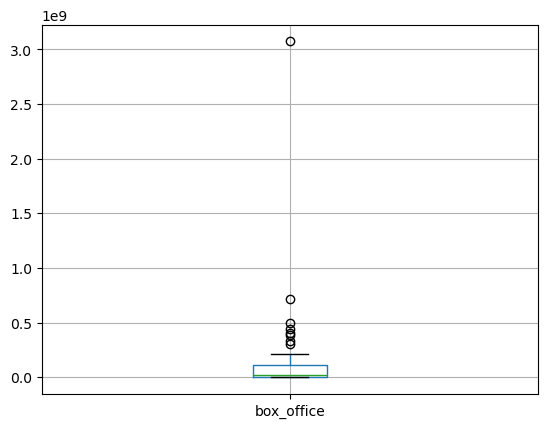

In [68]:
years = [2015, 2016, 2017, 2018, 2019]
for year in years:
    gosmovies.query('show_year == @year').boxplot(column = 'box_office')
    plt.show()
    

Так и есть. Есть выбросы в разы превыщающие средние показатели. Не будем тх исключать из данных, чтобы потом в рейтингах видеть все фильмы. Но для дальнейшего анализа используем медианные значения.

Рассмотрим корреляцию между объемами гос.вливаний и кассовыми сборами.

In [69]:
#Оставим только фильмы которые вышли в кинопрокат.
cass_gosmovies = gosmovies.query('box_office > 0')
cass_gosmovies['budget'].corr(cass_gosmovies['box_office'])

0.38167108693505275

 Корреляция бюджета и сборов слабая.

Добавим столбец в котором будет расчитана разница между сбором и бюджетом, чтобы примерно представлять себе окупились ли те или иные фильмы.


In [70]:
gosmovies['profit'] = gosmovies['box_office'] - gosmovies['budget']

Посмотрим на 15 фильмов, с самыми большими ~~надеждами~~ бюджетами.

In [71]:
gosmovies.sort_values(by = 'budget', ascending = False).head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director,profit
7114,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",США,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,...,2305.07,Фонд кино,5.80,"приключения,фэнтези",333597059.59,0.12,2019,комедия,комедия,333594754.52
5437,Матильда,111005717,2017-08-17,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",США,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,...,1032.91,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,0.29,2017,комедия,комедия,511774515.09
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",США,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,...,980.00,Фонд кино,6.00,"история,биография,драма",717703185.53,0.51,2019,комедия,комедия,717702205.53
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",США,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,...,944.00,Фонд кино,5.70,"фантастика,боевик",NaN,0.53,2019,комедия,комедия,NaN
7171,Грех,111014419,2019-08-31,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,США,А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,...,779.94,Министерство культуры,6.90,"драма,биография,история",54243202.71,0.08,2019,комедия,комедия,54242422.77
3351,Дуэлянт,111015416,2016-09-14,Художественный,"ООО ""Нон-Стоп Продакшн""",США,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,...,684.20,Фонд кино,6.60,драма,364285139.60,0.66,2016,комедия,комедия,364284455.40
2920,Экипаж .,111005416,2016-03-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",США,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.00,...,635.28,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,0.70,2016,комедия,комедия,1402254754.72
5653,Движение вверх,111011817,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",США,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,590.19,Фонд кино,7.50,"спорт,драма",2779686144.00,0.68,2017,комедия,комедия,2779685553.81
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",США,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,...,563.78,Фонд кино,6.50,"драма,военный,боевик",2271754004.52,0.32,2018,комедия,комедия,2271753440.74
3255,Время первых (2017),111001317,2017-02-21,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",США,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000000.00,...,528.44,Фонд кино,7.50,"приключения,триллер,биография",544332260.00,0.47,2017,комедия,комедия,544331731.56


"Тайна печати дракона" стоил нашему государству дороже всего, 2.3 миллиарда рублей. Возможно из-за гонарара Джеки Чана?) Хоть на каскадерах сэкономили.

А вот по сборам.... Тадададааам, неутешительно, этот же фильм оглушает своим провалом. Убыток от его создания порядка двух миллиардов рублей.

In [72]:
print('С 2010 по 2019 ФК и МинКульт вложили в создание фильмов', round(gosmovies['budget'].sum()))
print('Эти фильмы собрали в кино', round(gosmovies['box_office'].sum()))
print('таким образом суммарная "условная прибыль"', round(gosmovies['profit'].sum()))

С 2010 по 2019 ФК и МинКульт вложили в создание фильмов 44522
Эти фильмы собрали в кино 42113509575
таким образом суммарная "условная прибыль" 42113466707


Прибыль ушла в минус. То есть фильмы спонсируемые ФК и МинКультом в сумме принесли убытки. 

Фильмы каких жанров больше собирают в прокате?

In [75]:
gosmovies.groupby('main_genre')['box_office'].sum().sort_values(ascending = False)
                     

main_genre
комедия   42113509574.78
Name: box_office, dtype: float64

На комедии в кино люди идут охотнее всего.

А на какие больше всего выделяют деньги?

In [77]:
gosmovies.groupby('main_genre')['budget'].sum().sort_values(ascending = False)

main_genre
комедия   44522.18
Name: budget, dtype: float64

Драмы влетают в копеечку.

Но первая тройка и по сборам и по бюджеты совпадает, это комедии, драмы и мультфильмы.

Посмотрим на 10 самых кассовых фильмов.

In [78]:
top_gosmovies = movies.query('financing_source != "Частное"').sort_values(by = 'box_office', ascending=False).head(10)
top_gosmovies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director
7456,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",США,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79,0.38,2019,комедия,комедия
5653,Движение вверх,111011817,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",США,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,400000000.00,590192191.00,Фонд кино,7.50,"спорт,драма",2779686144.00,0.68,2017,комедия,комедия
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",США,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,120000000.00,563784717.00,Фонд кино,6.50,"драма,военный,боевик",2271754004.52,0.32,2018,комедия,комедия
5505,Последний богатырь,111007017,2017-10-19,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",США,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.00,50000000.00,352477575.00,Фонд кино,6.80,"комедия,фэнтези,приключения",1655037688.00,0.28,2017,комедия,комедия
5708,Лёд,111000518,2018-02-01,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",США,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.00,60000000.00,148585222.00,Фонд кино,NaN,не указан,1445731797.89,0.57,2018,комедия,комедия
2920,Экипаж .,111005416,2016-03-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",США,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.00,392104482.00,635283867.00,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,0.70,2016,комедия,комедия
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",США,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,409836065.57,Фонд кино,5.60,фантастика,1038321489.00,inf,2016,комедия,комедия
5641,Ёлки Новые,111011617,2017-12-21,Художественный,"ООО ""ТаББаК""",США,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.00,50000000.00,174381922.00,Фонд кино,5.80,"комедия,мелодрама",855451052.00,0.57,2017,комедия,комедия
5826,Тренер,111003218,2018-04-19,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",США,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0.00,260000000.00,390191139.00,Фонд кино,6.80,"драма,спорт",820528005.21,0.67,2018,комедия,комедия
5659,Три богатыря и принцесса Египта,114003317,2017-12-21,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",США,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000.00,0.00,174464395.00,Фонд кино,5.50,"мультфильм,приключения,семейный",759226773.00,0.29,2017,комедия,комедия


Топ - "Холоп", "Движение вверх", "Т-34", "Последний богатырь", "Лед".

Все эти фильмы вышли при поддержке Фонда Кино. Что оправдано, ведь ФК как раз спонсирует в основном более коммерческие понятныеи фильмы. В то время, как министерство кино поддерживает больше неккомерческих, детских, документальных и авторских фильмов.

Какие же фильмы самые любимые зрителями

In [79]:
toprating_gosmovies = movies.query('financing_source != "Частное"').sort_values(by = 'ratings', ascending=False).head(10)
toprating_gosmovies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,gos_fin_perc,show_year,main_genre,main_director
2146,Главный,111003415,2015-03-27,Художественный,"ООО ""Киностудия ""МАСТЕР""",США,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,9.40,"фантастика,боевик,комедия",334750.00,0.25,2015,комедия,комедия
3139,Я умею вязать,111019615,2015-11-27,Художественный,"ООО ""Белое Зеркало""",США,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,4700000.00,14462464.00,Министерство культуры,9.00,драма,801370.00,0.32,2015,комедия,комедия
3627,БОЛЬШОЙ,111017416,2016-11-22,Художественный,"ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",США,В.Тодоровский,"В.Тодоровский, А.Златопольский",«12+» - для детей старше 12 лет,10000000.00,200000000.00,320000000.00,Фонд кино,8.50,"криминал,комедия,боевик",228578204.00,0.66,2016,комедия,комедия
1870,А зори здесь тихие..._,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",США,Р.Давлетьяров,нет данных,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.50,"драма,военный,история",249166767.70,0.68,2015,комедия,комедия
6855,Миллиард,111006719,2019-04-17,Художественный,"ООО ""Медиа Юниверсал Ивент""",США,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",«12+» - для детей старше 12 лет,0.00,140000000.00,240041307.00,Фонд кино,8.20,драма,408646665.70,0.58,2019,комедия,комедия
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",США,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,0.33,2013,комедия,комедия
3782,Мотылёк.,111001617,2017-03-22,Художественный,"ООО ""Кинокомпания КИТ""",США,К.Худяков,"Е.Бабенко, В.Ремизов",«18+» - запрещено для детей,7346881.00,30000000.00,63170000.00,"Министерство культуры, Фонд кино",8.00,драма,410058.00,0.59,2017,комедия,комедия
7180,Байкал - Сердце мира 3D,112004619,2019-11-01,Документальный,"ООО ""Продюсерский центр ""Новое Время""",США,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,3000000.00,33000000.00,Министерство культуры,8.00,семейный,NaN,0.09,2019,комедия,комедия
7254,Герой,111015819,2019-09-26,Художественный,"ООО ""Карго""",США,К.Оганисян,К.Оганисян,«12+» - для детей старше 12 лет,20000000.00,100000000.00,250000000.00,Фонд кино,7.90,"фэнтези,боевик,драма",172871342.04,0.48,2019,комедия,комедия
2482,Однажды._,111004215,2015-04-15,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",США,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.00,97000000.00,156360666.00,Фонд кино,7.90,"драма,криминал,детектив",12748398.30,0.62,2015,комедия,комедия


Здесь уже гораздо чаще встречаются фильмы спонсируемые Фондом Кино.

А вообще подборка, не самая популярная. Интересно было бы посмотреть количество оценок и исключить фильмым с низким количеством. Возможно картина изменилась бы.

## ОБЩИЙ ВЫВОД

**1.** Мы взяли два массива данных, опубликованных на портале открытых данных министерства культуры РФ.

Один содержал в себе информацию о фильмах получивших прокатное удостоверение, такую как: год лицензии, страна, жанры, режисссеры, продюсссеры, бюджет, категория и пр. Во втором информация о кассовых сборах. 


**2.** Предобработка данных.

- Проведена работа по коррекции типов и формата данных:

  - Объеденена информация из двух датафреймов в один. 

  - Подкорректирован столбец в датой начала проката.

  - Данные о рейтингах приведены в к общему виду.
  
- Изучены и обрботаны пропуски:

  - Кино которое не получало государственного субсидирования отметили как "частное".

  - Проставили 0, в информации об объёмах государственных средств, где их не было.

  - Пропуски в категориях страна, продюссер, режиссер и жанр заменила на "не указано".

  - Пропуски в рейтингах оставили без изменений.

  - Пропуски в кассовых сборах,тоже оставили без изменений.
  
- Проведена работа по обработке явных и неявных дубликатов: 

  - Заменили дубликаты в графе о номере прокатного удостоверия.

  - Откорректировали даные в графах 'type', 'film_studio', 'production_country', 'producer', 'director', 'genres', удалив них лишние пробелы, тем самым исключив наличие неявных дубликатов.

  - Привели знаки пунктуации в графе страна-производитель к общему виду.

- Обработали недостающие количественные значение в таблице:

  - Расчитали медианный коэффициент поддержки фильмов государством.

  - Зная этот коэффициент расчитали и дополнили таблицу данными о бюджете.
  
- Добавлены новые столбцы с данными о:

  - году проката
  
  - главном жанре
  
  - главном режиссере


**3.** Исследовательский анализ:

1) Количество выпускаемых фильмов:

- Самое большее число фильмов получивших прокатное удостоверение было в 2010-м году.

Из них в кинопрокат попало 105, это 10%, Это самый маленьких показатель среди всег годов.

- Меньше всего фильмов вышло в 2017-м году, из них в кинотеатры попало 357, это 70%. Это самый высокий показатель.

Данные наглядно представлены на графике.

2) Кассовые сборы:

- Самым скромным - 2010-й год, всего около 2.5 миллионов общих кассовых сборов.
- Резкий взлет объемов выручки в 2015-связан с усилением доллара относительно рубля.
- Самым урожайным на кассовые сборы оказался 2018-й год, 49 миллиардов рублей.
- Медианная прибыль по фильмам:

  - резкий скачок доходность, опять связанос курсом доллара.
  - Далее чем большее количество фильмов выходило в год, тем ниже средняя доходность на 1 фильм.

Данные визуализированы таблицей и графиком.

3) Возрастная категория:

- Фильмы категории 12+, 16+, 18+ показывают стобильную динамику.

- Скачки есть в 2-17-м году, в категориях 0+ и 6+. Добавлен рейтинг фильмо

**4.** Анализ фильмов с государственной поддержкой.

1)Количество вышедших фильмов.

- Всего с 2010 по 2019-й год при госуударственной поддержке вышло 322 фильма.
- Динамика количества вышедших фильмовс гос.под. по годам совпадает с с динамикой всех фильмов. В 2015-м большевышло больше всего фильмов, 86, к 2017-му резкий спад, 41 фильм.
- Данные дполнены графиком количества вышедших фильмо с разбивкой по источникам финансирования.

2) Бюджет.

- Первй резкий скачок объемов финансирования в 2015-м году, 8 миллиардов рублей.
Опять же это момент, подорожания доллара.

- Второй в 2019, 12.8 миллиардов рублей.

- Средняя стоимость фильма в 2015 году упала с 61 до 57 миллионов рублей. Значит увеличение объемов финансирования связано исключительно с количеством фильмов.

- Самые дорогие фильмы выходили в 2018-м году, средний бюджет был 103 миллиона.

3) Сборы.

- Сборы по годам, очень разномастны и неоднозанчны. Большие ращличия между медианный и средними значениями, говорит нам о наличии выбросов. Что-то ультрапопулярное меняет картину достаточно резко.

- Корреляция между денежными вливаниями и сборами слабая.

- Составлена таблица с 15-ю самыми кассовыми фильмами.

- Даблица дополнена столбцом с разницей между бюджетом и прибылью, она примерно показывает окупаемость тех или иных фильмов.

- Финансирование фильмов не окупается.

С 2010 по 2019 ФК и МинКульт вложили в создание фильмов 44 522 183 095 руб.

Эти фильмы собрали в кино 42 113 509 575 руб.

Таким образом убыток составил 754 575 739 руб.

- Составлен рейтинг 10 самых доходных фильмов.

Топ - "Холоп", "Движение вверх", "Т-34", "Последний богатырь", "Лед". Все эти фильмы вышли при поддержке Фонда Кино, что и логично, этот источник финансирует более коммерческие проекты.



4) Жанры.

Больше всего денег приносят фильмы созданные в жанре:

комедия       12 479 977 454.33 руб.

драма          9 490 844 101.04 руб.

мультфильм     5 622 014 134.66 руб.

Больше всего денег было потрачено на создание:

драма         11 174 837 507.67 руб.

комедия        6 300 832 781.64 руб.

мультфильм     6 154 351 926.02 руб.

5) Рейтинг.

Составлен топ с самыми высокими оценками. В нем не самые известные фильмы. Скорее всего это связано с количеством оценок. Желательно добавить данные этим показателем и можно его еще раз исследовать.